# Import necessary modules

In [1]:
import pandas as pd
import math
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
from IPython.display import Image

# Load dataset

1. Super_dataset is the final dataset from our previous stage.
2. World_dataset is the dataset for world-wide data.

In [2]:
super_dataset = pd.read_csv('../../../data/stage_I/superDataset.csv')
world_dataset = pd.read_csv('../../../data/stage_II/owid-covid-data.csv')
super_dataset.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-22_deaths,2020-01-23_cases,2020-01-23_deaths,2020-01-24_cases,...,2021-03-13_cases,2021-03-13_deaths,2021-03-14_cases,2021-03-14_deaths,2021-03-15_cases,2021-03-15_deaths,2021-03-16_cases,2021-03-16_deaths,2021-03-17_cases,2021-03-17_deaths
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,55869,0,0,0,0,0,...,6416,95,6426,95,6471,95,6474,95,6483,96
2,1003,Baldwin County,AL,1,223234,0,0,0,0,0,...,20091,294,20103,294,20210,294,20227,294,20263,295
3,1005,Barbour County,AL,1,24686,0,0,0,0,0,...,2181,53,2184,53,2195,53,2198,53,2199,54
4,1007,Bibb County,AL,1,22394,0,0,0,0,0,...,2479,60,2481,60,2499,60,2508,60,2512,60


In [3]:
world_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
countries = ['Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'United States']

filtered_dataset = world_dataset[world_dataset.location.isin(countries)]

## Get United States data

1. Pull DataFrame whose location is "United States".
2. Fill empty columns with 0 value. Empty columns in this case represents that there are no recorded values
3. Extract year and week number from date column by converting date string to datetime object
    * To group the weekly data, we can use the exact date and get the week number. Since all 7 days of the same week will have the same year and week number, we can group data by year and week number combined.
    * To do that, we use apply and lambda where all date values are converted to datetime and then the year, week, and day are extracted from that.
    * The new values of year and week are added as new column values

In [5]:
us_dataset = world_dataset[world_dataset.location == 'United States'].fillna(0)
us_dataset[['year', 'week', 'day']] = pd.DataFrame(us_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=us_dataset.index)
us_dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year,week,day
68974,USA,North America,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,3
68975,USA,North America,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,4
68976,USA,North America,United States,2020-01-24,2.0,1.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,5
68977,USA,North America,United States,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,6
68978,USA,North America,United States,2020-01-26,5.0,3.0,0.0,0.0,0.0,0.0,...,10.79,19.1,24.6,0.0,2.77,78.86,0.926,2020,4,7


<p style='text-align: right;'> Done by Pratik Devkota </p>

## Group data

1. Group data by year and week.
2. Apply mean on each group.
3. Apply lambda function to round each value to its nearest integer value.
4. Append starting date of each week in the aggregated dataframe.

In [6]:
weekly_data = us_dataset.groupby(['year', 'week']).mean()[["new_cases", "new_deaths"]].apply(lambda x: np.round(x).astype("int")).reset_index()
weekly_data['date'] = weekly_data.apply(lambda x: datetime.strptime("{0}-{1}-1".format(x[0], x[1]), "%G-%V-%u").date().__str__(), axis=1)
weekly_data.tail()

,year,week,new_cases,new_deaths,date
54,2021,5,117222,2939,2021-02-01
55,2021,6,90947,2463,2021-02-08
56,2021,7,66162,1858,2021-02-15
57,2021,8,67314,1944,2021-02-22
58,2021,9,62149,1953,2021-03-01


<p style='text-align: right;'> Done by Pratik Devkota </p>

## Display aggregated data

For both new_cases and new_deaths, read and display mean, median and mode values.

In [7]:
desc = weekly_data.describe().apply(lambda x: np.round(x).astype('int'))
for i in ['new_cases', 'new_deaths']:
    print("MEAN {0} per WEEK:\t".format(i.upper()), desc[i].loc["mean"])
    print("MEDIAN {0} per WEEK:\t".format(i.upper()), desc[i].loc["50%"])
    for k, v in weekly_data.new_cases.value_counts()[:1].to_dict().items():
        print("MODE {0} per WEEK:\t".format(i.upper()), k, ", frequency:", v)
    print("\n\n")

MEAN NEW_CASES per WEEK:	 70251
MEDIAN NEW_CASES per WEEK:	 43990
MODE NEW_CASES per WEEK:	 0 , frequency: 3



MEAN NEW_DEATHS per WEEK:	 1274
MEDIAN NEW_DEATHS per WEEK:	 957
MODE NEW_DEATHS per WEEK:	 0 , frequency: 3





<p style='text-align: right;'> Done by Pratik Devkota </p>

### Weekly Mean of Cases  
Create general function to obtain weekly mean of new cases for every week since COVID-19 appeared in a country.  
1.) Filter the dataset to contain only data from a specific country.  
2.) Separate the daily date into year, month, and day values.  
3.) Group by the year and week and find the mean value of new cases for each week.  
4.) Return the weekly mean values.  

Author: Erika Sudderth (Generalized function based on Pratik Devkota's code)

In [8]:
def get_weekly_mean(country):
    country_dataset = filtered_dataset[filtered_dataset.location == country].fillna(0)
    country_dataset[['year', 'week', 'day']] = pd.DataFrame(country_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=country_dataset.index)
    week_data = country_dataset.groupby(['year', 'week']).mean()[["new_cases", "new_deaths"]].apply(lambda x: np.round(x).astype("int")).reset_index()
    week_data['date'] = week_data.apply(lambda x: datetime.strptime("{0}-{1}-1".format(x[0], x[1]), "%G-%V-%u").date().__str__(), axis=1)

    return week_data['new_cases']

### Weekly Mean of Deaths 
Create general function to obtain weekly mean of new deaths for every week since COVID-19 appeared in a country.  
1.) Filter the dataset to contain only data from a specific country.  
2.) Separate the daily date into year, month, and day values.  
3.) Group by the year and week and find the mean value of new deaths for each week.  
4.) Return the weekly mean values.  

Author: Erika Sudderth (Generalized function based on Pratik Devkota's code)

In [9]:
def get_weekly_mean_deaths(country):
    country_dataset = filtered_dataset[filtered_dataset.location == country].fillna(0)
    country_dataset[['year', 'week', 'day']] = pd.DataFrame(country_dataset.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isocalendar()).to_list(), index=country_dataset.index)
    week_data = country_dataset.groupby(['year', 'week']).mean()[["new_cases", "new_deaths"]].apply(lambda x: np.round(x).astype("int")).reset_index()
    week_data['date'] = week_data.apply(lambda x: datetime.strptime("{0}-{1}-1".format(x[0], x[1]), "%G-%V-%u").date().__str__(), axis=1)
                             
    return week_data['new_deaths']

### Compare Cases Center of 5 Different Countries  
Get the weekly mean, median, and mode for each country and display it in a chart.  

Notes: The mode does not seem to be a good measure of center for this data as it is heavily influenced by the initial stages of COVID-19 when cases were not high. The mode for Pakistan, Brazil, and Bangladesh have multiple values (Pakistan and Brazil has many values and could not be completely displayed). The only country with values comparable to the United States is Brazil (based on mean and median) and even then, the United States' values are significantly higher.  

Author: Erika Sudderth

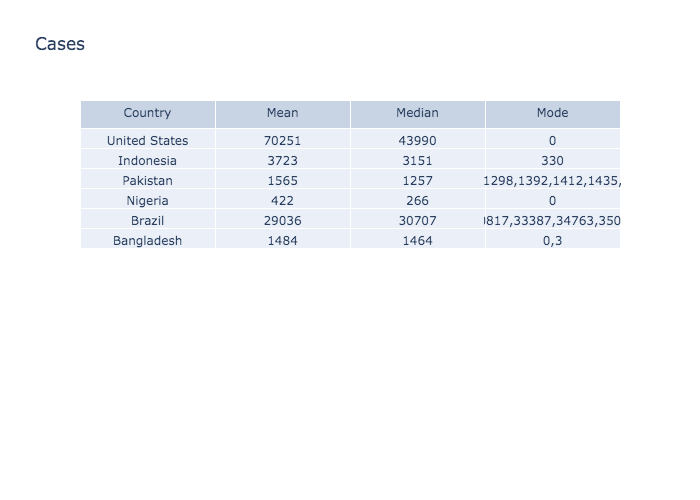

In [10]:
center_data_chart = go.Figure(data=[go.Table(header=dict(values=['Country', 'Mean', 'Median', 'Mode']),
            cells=dict(values=[['United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh'],
            [math.ceil(get_weekly_mean('United States').mean()), math.ceil(get_weekly_mean('Indonesia').mean()), 
            math.ceil(get_weekly_mean('Pakistan').mean()), math.ceil(get_weekly_mean('Nigeria').mean()), 
            math.ceil(get_weekly_mean('Brazil').mean()),math.ceil(get_weekly_mean('Bangladesh').mean())], 
            [math.ceil(get_weekly_mean('United States').median()), math.ceil(get_weekly_mean('Indonesia').median()), 
            math.ceil(get_weekly_mean('Pakistan').median()), math.ceil(get_weekly_mean('Nigeria').median()), 
            math.ceil(get_weekly_mean('Brazil').median()), math.ceil(get_weekly_mean('Bangladesh').median())], 
            [get_weekly_mean('United States').mode(), get_weekly_mean('Indonesia').mode(), 
            get_weekly_mean('Pakistan').mode(), get_weekly_mean('Nigeria').mode(), 
            get_weekly_mean('Brazil').mode(), get_weekly_mean('Bangladesh').mode()]]))
                     ])
center_data_chart.update_layout(title_text = 'Cases')

cases_image = center_data_chart.to_image(format="png")
Image(cases_image)

### Compare Deaths Center of 5 Different Countries  
Get the weekly mean, median, and mode for each country and display it in a chart.  

Notes: The mode does not seem to be a good measure of center for this data as for some countries it is heavily influenced by the initial stages of COVID-19 when cases were not high. The mode for Indonesia and Pakistan have multiple values. The only country with values comparable to the United States is Brazil (based on mean and median) and even then, the United States' values are significantly higher.  

Author: Erika Sudderth

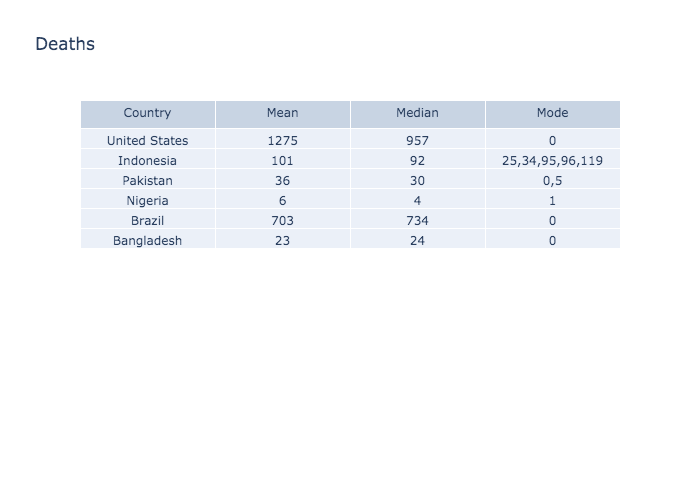

In [11]:
center_data_chart_deaths = go.Figure(data=[go.Table(header=dict(values=['Country', 'Mean', 'Median', 'Mode']),
        cells=dict(values=[['United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh'],
        [math.ceil(get_weekly_mean_deaths('United States').mean()), math.ceil(get_weekly_mean_deaths('Indonesia').mean()), 
        math.ceil(get_weekly_mean_deaths('Pakistan').mean()), math.ceil(get_weekly_mean_deaths('Nigeria').mean()), 
        math.ceil(get_weekly_mean_deaths('Brazil').mean()),math.ceil(get_weekly_mean_deaths('Bangladesh').mean())], 
        [math.ceil(get_weekly_mean_deaths('United States').median()), math.ceil(get_weekly_mean_deaths('Indonesia').median()), 
        math.ceil(get_weekly_mean_deaths('Pakistan').median()), math.ceil(get_weekly_mean_deaths('Nigeria').median()), 
        math.ceil(get_weekly_mean_deaths('Brazil').median()), math.ceil(get_weekly_mean_deaths('Bangladesh').median())], 
        [get_weekly_mean_deaths('United States').mode(), get_weekly_mean_deaths('Indonesia').mode(), 
        get_weekly_mean_deaths('Pakistan').mode(), get_weekly_mean_deaths('Nigeria').mode(), 
        get_weekly_mean_deaths('Brazil').mode(), get_weekly_mean_deaths('Bangladesh').mode()]]))
                     ])
center_data_chart_deaths.update_layout(title_text = 'Deaths')
deaths_image = center_data_chart_deaths.to_image(format="png")
Image(deaths_image)